In [1]:
pip install wbgapi plotly eurostat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 3.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [64]:
import eurostat as es
import pandas as pd


def MonthlyElectricity():
    try: 
        # Specificy the pivotal columns, geo\\time = country, indic=kind of energy
        id_vars = ['geo\\TIME_PERIOD', 'indic']
        # The indic column uses internal EU indicators, we'll translate them to what we want with this dictionary
        indicator_dictionary = {"IS-PEL-GWH" : "Production", "IS-CEL-GWH" : "Consumption", "IS-IEL-GWH" : "Imports"}

        #data filtering
        df = es.get_data_df("EI_ISEN_M")
        df.drop(columns=['freq','s_adj'], inplace=True)
        df = df.melt(id_vars=id_vars, var_name='Date', value_name='GWH')
        df = df[df['indic'].isin(indicator_dictionary.keys())]
        df['indic'] = df['indic'].replace(indicator_dictionary)
        df.to_csv("data/ElectricityM.csv", index=False)
        
        return df
    except Error as e:
        return f"quit with {e} as error"

df = MonthlyElectricity()
EUList = ['AT', 'BE', 'BG', 'HR', 'CY', 'DK', 'EE', 'FI', 'FR', 'DE', 'IE', 'IT', 'LV', 'LU', 'NL', 'NO', 'PL', 'RO', 'ES', 'SE', 'CH', 'GB']
filtered_df = df[df['geo\TIME_PERIOD'].isin(EUList)]
#print(filtered_df)

belgiumdf2 = filtered_df[filtered_df['geo\\TIME_PERIOD'] == 'BE']
unique_values = belgiumdf2['indic'].unique()

Datelist = ['2011-01','2011-02','2011-03','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12']
belgiumdf3 = belgiumdf2[belgiumdf2['Date'].isin(Datelist)]


# Initialize a dictionary to store the summed energy values for each unique value
summed_energy2 = {}

# Loop through unique values and calculate the sum of energy for each
for value in unique_values:
    summed_energy2[value] = belgiumdf3[belgiumdf3['indic'] == value][['GWH']].sum()

# Print the summed energy for each unique value
for value, total_energy in summed_energy2.items():
    print(f"Total energy for \n'{value}': {total_energy}")

total_energy_sum2 = sum(summed_energy2.values())
print(f"Sum of all total energies: {total_energy_sum2}")

# Define the conversion factor
conversion_factor = 0.0859845  # ktoe per GWh

# Convert from GWh to ktoe
energy_ktoe = total_energy_sum2 * conversion_factor

# Print the result
print(f"{total_energy_sum2} GWh is approximately equal to {energy_ktoe} ktoe")


Total energy for 
'Consumption': GWH    85586.0
dtype: float64
Total energy for 
'Imports': GWH    13549.0
dtype: float64
Total energy for 
'Production': GWH    0.0
dtype: float64
Sum of all total energies: GWH    99135.0
dtype: float64
GWH    99135.0
dtype: float64 GWh is approximately equal to GWH    8524.073408
dtype: float64 ktoe


In [95]:
import eurostat as es
import pandas as pd

def TypesOfEnergy():
    try: 
        # Specificy the pivotal columns, geo\\time = country, indic=kind of energy
        id_vars = ['geo\\TIME_PERIOD', 'indic']
        # The indic column uses internal EU indicators, we'll translate them to what we want with this dictionary
        indicator_dictionary = {"C0000X0350-0370" : "Solid Fossil Fuels", "IS-CEL-GWH" : "Consumption", "IS-IEL-GWH" : "Imports"}
        df = es.get_data_df("ten00122")
        df.drop(columns=['freq','nrg_bal','unit'], inplace=True)
       # df = df.melt(id_vars=id_vars, var_name='Date', value_name='GWH')
       # df = df[df['indic'].isin(indicator_dictionary.keys())]
       # df['indic'] = df['indic'].replace(indicator_dictionary)
        #df.to_csv("ElectricityM.csv", index=False)
        return df
    except Exception as e:
        return f"quit with {e} as error"

df2 = TypesOfEnergy()
#print(df2)
df2.fillna(0, inplace=True)
#change column name to country and also energy_kind
df2 = df2.rename(columns={'geo\\TIME_PERIOD': 'country'})
df2 = df2.rename(columns={'siec': 'energy'})



belgiumdf = df2[df2['country'] == 'AL']
unique_values = belgiumdf['energy'].unique()

# Initialize a dictionary to store the summed energy values for each unique value
summed_energy_data = {}

# Loop through unique values and calculate the sum of energy for each
for value in unique_values:
    summed_energy[value] = belgiumdf[belgiumdf['energy'] == value][['2011']].sum()
    
# Print the summed energy for each unique value
for value, total_energy in summed_energy.items():
    print(f"Total energy for \n'{value}': {total_energy}")

total_energy_sum = sum(summed_energy.values())
print(f"Sum of all total energies: {total_energy_sum}")

# Define the reverse conversion factor
reverse_conversion_factor = 11.631  # GWh per ktoe

# Convert from ktoe to GWh
energy_gwh = total_energy_sum / reverse_conversion_factor

# Print the result
print(f"{total_energy_sum} ktoe is approximately equal to {energy_gwh} GWh")

#remap all energy values 
unique_energy_values = df2['energy'].unique()

# Print the unique energy values
for energy in unique_energy_values:
    print(energy)

# Define a mapping of old values to new values
value_mapping = {
    'C0000X0350-0370': 'Solid fossil fuels',
    'C0350-0370': 'Manufactured gases',
    'P1000': 'Peat and peat products',
    'S2000': 'Oil shale and oil sands',
    'O4000XBIO': 'Oil and petroleum products (excluding biofuel portion)',
    'G3000': 'Natural gas',
    'RA000': 'Renewables and biofuels',
    'W6100_6220': 'Non-renewable waste',
    'N900H': 'Nuclear heat',
    'H8000': 'Heat',
    'E7000': 'Electricity',
    'TOTAL': 'Total'
}
# Replace the values in the DataFrame
df2['energy'] = df2['energy'].replace(value_mapping)

print(df2.head(10))



Total energy for 
'C0000X0350-0370': 2011    138.974
dtype: float64
Total energy for 
'C0350-0370': 2011    0.0
dtype: float64
Total energy for 
'E7000': 2011    280.482
dtype: float64
Total energy for 
'G3000': 2011    12.016
dtype: float64
Total energy for 
'H8000': 2011    0.0
dtype: float64
Total energy for 
'N900H': 2011    0.0
dtype: float64
Total energy for 
'O4000XBIO': 2011    1218.293
dtype: float64
Total energy for 
'P1000': 2011    0.0
dtype: float64
Total energy for 
'RA000': 2011    575.002
dtype: float64
Total energy for 
'S2000': 2011    0.0
dtype: float64
Total energy for 
'TOTAL': 2011    2224.767
dtype: float64
Total energy for 
'W6100_6220': 2011    0.0
dtype: float64
Sum of all total energies: 2011    4449.534
dtype: float64
2011    4449.534
dtype: float64 ktoe is approximately equal to 2011    382.558164
dtype: float64 GWh
C0000X0350-0370
C0350-0370
E7000
G3000
H8000
N900H
O4000XBIO
P1000
RA000
S2000
TOTAL
W6100_6220
               energy country       2010       

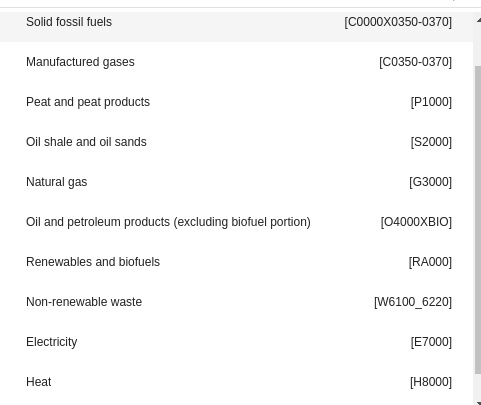



                   energy country  year  consumption
0      Solid fossil fuels      AL  2010      110.900
1      Solid fossil fuels      AT  2010     3383.533
2      Solid fossil fuels      BA  2010        0.000
3      Solid fossil fuels      BE  2010     3787.179
4      Solid fossil fuels      BG  2010     6938.197
...                   ...     ...   ...          ...
5899  Non-renewable waste      SK  2021      236.983
5900  Non-renewable waste      TR  2021     1082.853
5901  Non-renewable waste      UA  2021        0.000
5902  Non-renewable waste      UK  2021        0.000
5903  Non-renewable waste      XK  2021        0.000

[5904 rows x 4 columns]


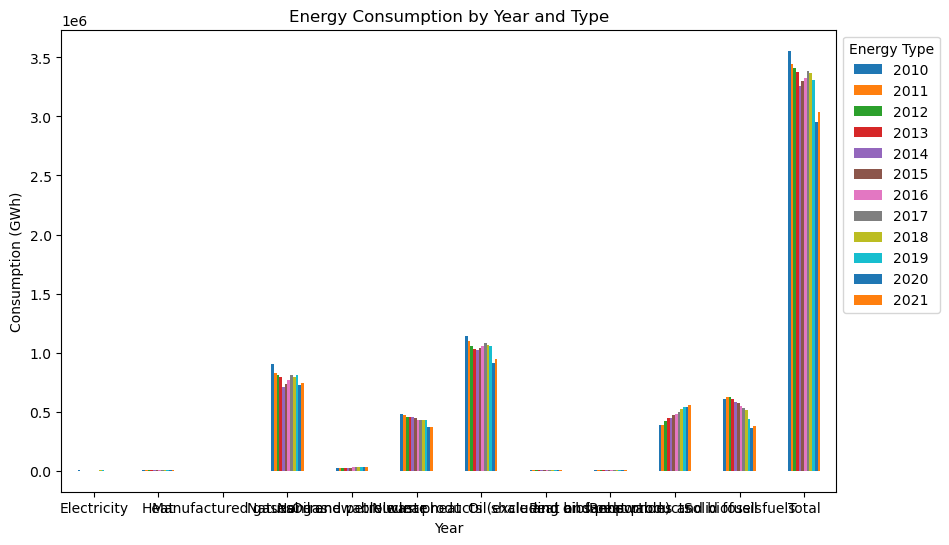

In [96]:
import matplotlib.pyplot as plt
df_pivot = df2.melt(id_vars=['energy', 'country'], var_name='year', value_name='consumption')

print(df_pivot)
grouped = df_pivot.groupby(['energy', 'year'])['consumption'].sum().unstack()

# Create a grouped bar plot
ax = grouped.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Consumption (GWh)')
plt.title('Energy Consumption by Year and Type')
plt.xticks(rotation=0)

# Add a legend
plt.legend(title='Energy Type', loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.show()








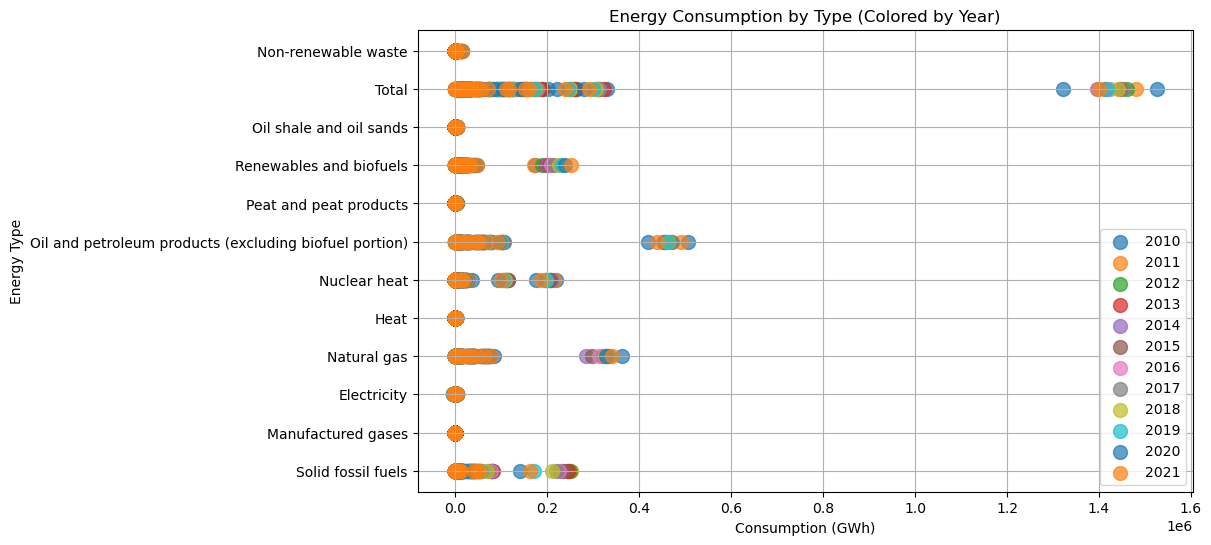

In [97]:

years = df2.columns[2:]  # Assuming the columns for years start at the third column

# Create a scatter plot with different colors for each year
plt.figure(figsize=(10, 6))

for i, year in enumerate(years):
    plt.scatter(df2[year], df2['energy'], s=100, alpha=0.7, label=year)

plt.xlabel('Consumption (GWh)')
plt.ylabel('Energy Type')
plt.title('Energy Consumption by Type (Colored by Year)')
plt.legend()
plt.grid()
plt.show()



In [89]:
unique_energy_values = df2['energy'].unique()

# Print the unique energy values
for energy in unique_energy_values:
    print(energy)
# Define a mapping of old values to new values
value_mapping = {
    'C0000X0350-0370': 'Solid fossil fuels',
    'C0350-0370': 'Manufactured gases',
    'P1000': 'Peat and peat products',
    'S2000': 'Oil shale and oil sands',
    'O4000XBIO': 'Oil and petroleum products (excluding biofuel portion)',
    'G3000': 'Natural gas',
    'RA000': 'Renewables and biofuels',
    'W6100_6220': 'Non-renewable waste',
    'N900H': 'Nuclear heat',
    'H8000': 'Heat',
    'E7000': 'Electricity',
    'TOTAL': 'Total'
}


C0000X0350-0370
C0350-0370
E7000
G3000
H8000
N900H
O4000XBIO
P1000
RA000
S2000
TOTAL
W6100_6220
                  energy country      2010      2011      2012      2013  \
0     Solid fossil fuels      AL   110.900   138.974    77.225    67.005   
1     Solid fossil fuels      AT  3383.533  3482.458  3245.066  3316.827   
2     Solid fossil fuels      BA     0.000     0.000     0.000     0.000   
3     Solid fossil fuels      BE  3787.179  3505.124  3235.666  3563.085   
4     Solid fossil fuels      BG  6938.197  8093.680  6915.000  5946.623   
..                   ...     ...       ...       ...       ...       ...   
487  Non-renewable waste      SK    35.206    39.553    44.306   125.514   
488  Non-renewable waste      TR     3.869     5.613     5.016     4.395   
489  Non-renewable waste      UA     0.000     0.000     0.000     0.000   
490  Non-renewable waste      UK   460.614   738.607   797.721   619.972   
491  Non-renewable waste      XK     0.000     0.000     0.000     0

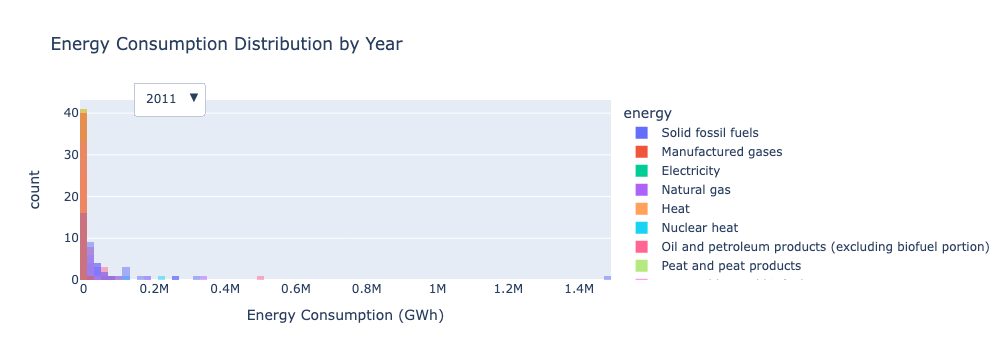

In [103]:
import pandas as pd
import plotly.express as px

# Create an interactive histogram with a dropdown for years
fig = px.histogram(df2, x='2011', color='energy', barmode='overlay', labels={'2011': 'Energy Consumption (GWh)'}, title='Energy Consumption Distribution by Year')

# Update the layout to include a dropdown menu for years
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {'method': 'restyle', 'args': [{'x': [df2['2011']], 'text': ['2011']}], 'label': '2011'},
                {'method': 'restyle', 'args': [{'x': [df2['2012']], 'text': ['2012']}], 'label': '2012'},
                {'method': 'restyle', 'args': [{'x': [df2['2013']], 'text': ['2013']}], 'label': '2013'},
                {'method': 'restyle', 'args': [{'x': [df2['2014']], 'text': ['2014']}], 'label': '2014'},
                {'method': 'restyle', 'args': [{'x': [df2['2015']], 'text': ['2015']}], 'label': '2015'},
                {'method': 'restyle', 'args': [{'x': [df2['2016']], 'text': ['2016']}], 'label': '2016'},
                {'method': 'restyle', 'args': [{'x': [df2['2017']], 'text': ['2017']}], 'label': '2017'},
                {'method': 'restyle', 'args': [{'x': [df2['2018']], 'text': ['2018']}], 'label': '2018'},
                {'method': 'restyle', 'args': [{'x': [df2['2019']], 'text': ['2019']}], 'label': '2019'},
                {'method': 'restyle', 'args': [{'x': [df2['2020']], 'text': ['2020']}], 'label': '2020'},
                {'method': 'restyle', 'args': [{'x': [df2['2020']], 'text': ['2020']}], 'label': '2021'},
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.1,
            'xanchor': 'left',
            'y': 1.1,
            'yanchor': 'top',
        },
    ]
)

# Show the interactive plot
fig.show()